# Boston AirBNB

## Introduction

### Business Questions

1. Which neighbourhoods are most expensive to stay in?

    When visiting Boston location is surely an important factor. Prospective hosts and guests can gain insights from this analysis to understand what resonable pricing is for each neighbourhood.

2. What are the main indicators of the price of an AirBNB

    Neighbourhood may be a good indicator of price, but there are many other potential avenues to explore, amenities, size, etc. could be important. The main focus here will be placed on actionable features, for example the host response rate - this is something that the host can actively change. A feature like number of reviews may be of little interest to the host as less direct action can be taken there.

3. What potential amenities could hosts invest in

    Given that the data contains a list of amenities available in each property we can attempt to price the value obtained from having the amenity, which the host can use in their decision to invest in these additional features.
    

### Reading in Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression #linear regression
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
from sklearn.preprocessing import StandardScaler #scaler

### Mounting content drive and reading in data (Google Colab)

In [2]:
# Mounting drive to access data file
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Changing directory to the google drive
%cd drive


/content/drive


In [4]:
# Reading in the data
boston_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Udacity Data Science Nanodegree/BostonABnB/listings.csv')

## Data Understanding and Cleaning


### Exploration

In [5]:
# looking at the data
boston_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [6]:
boston_data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,0.000000e+00,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [7]:
# displaying available features
features = list(boston_data.columns)
features

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


Now narrowing this down to the features which we are interested in

In [8]:
# manually selecting features of interest out of the available options
features_of_interest = [
                        'experiences_offered',
                        'host_response_time',
                        'host_response_rate',
                        'host_acceptance_rate',
                        'host_is_superhost',
                        'host_has_profile_pic',
                        'host_identity_verified',
                        'host_listings_count',
                        'neighbourhood',
                        'property_type',
                        'room_type',
                        'accommodates',
                        'bathrooms',
                        'bedrooms',
                        'beds',
                        'bed_type',
                        'amenities',
                        'square_feet',
                        'price',
                        'security_deposit',
                        'cleaning_fee',
                        'guests_included',
                        'extra_people',
                        'minimum_nights',
                        'maximum_nights',
                        'instant_bookable',
                        'cancellation_policy',
                        'require_guest_profile_picture',
                        'require_guest_phone_verification',
                      ]

# filtering dataset to only look at features of interest
boston_df = boston_data[features_of_interest]
boston_df.head()

,experiences_offered,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,host_listings_count,neighbourhood,property_type,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,none,NaN,NaN,NaN,f,t,f,1,Roslindale,House,...,NaN,$35.00,1,$0.00,2,1125,f,moderate,f,f
1,none,within an hour,100%,100%,f,t,t,1,Roslindale,Apartment,...,$95.00,$10.00,0,$0.00,2,15,t,moderate,f,f
2,none,within a few hours,100%,88%,t,t,t,1,Roslindale,Apartment,...,NaN,NaN,1,$20.00,3,45,f,moderate,t,f
3,none,within a few hours,100%,50%,f,t,f,1,NaN,House,...,$100.00,$50.00,2,$25.00,1,1125,f,moderate,f,f
4,none,within an hour,100%,100%,t,t,t,1,Roslindale,House,...,NaN,$15.00,1,$0.00,2,31,f,flexible,f,f


In [9]:
boston_df['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Downtown                8
Leather District        8
Brookline               8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

## Data Transformation

### Handling Categorical Data

In [12]:
# looking at the non-numerical data

# number of different categories for each categorical value
cat_counts = {}
for feature in list(boston_df.select_dtypes(include=['object']).columns):
  cat_counts[feature] = len(boston_df[feature].value_counts())

sorted_cat_counts = dict(sorted(cat_counts.items(), key = lambda item: item[1]))
sorted_cat_counts

{'experiences_offered': 1,
 'host_is_superhost': 2,
 'host_has_profile_pic': 2,
 'host_identity_verified': 2,
 'instant_bookable': 2,
 'require_guest_profile_picture': 2,
 'require_guest_phone_verification': 2,
 'room_type': 3,
 'host_response_time': 4,
 'cancellation_policy': 4,
 'bed_type': 5,
 'property_type': 13,
 'neighbourhood': 30,
 'extra_people': 51,
 'host_response_rate': 52,
 'security_deposit': 54,
 'host_acceptance_rate': 72,
 'cleaning_fee': 79,
 'price': 324,
 'amenities': 3092}

Let's take a look at the categorical features with many different values.

In [13]:
boston_df[['extra_people', 'host_response_rate', 'security_deposit', 'host_acceptance_rate', 'cleaning_fee', 'price', 'amenities']]

,extra_people,host_response_rate,security_deposit,host_acceptance_rate,cleaning_fee,price,amenities
0,$0.00,NaN,NaN,NaN,$35.00,$250.00,"{TV,""Wireless Internet"",Kitchen,""Free Parking ..."
1,$0.00,100%,$95.00,100%,$10.00,$65.00,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
2,$20.00,100%,NaN,88%,NaN,$65.00,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit..."
3,$25.00,100%,$100.00,50%,$50.00,$75.00,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
4,$0.00,100%,NaN,100%,$15.00,$79.00,"{Internet,""Wireless Internet"",""Air Conditionin..."
...,...,...,...,...,...,...,...
3580,$24.00,96%,$95.00,100%,NaN,$69.00,"{Internet,""Wireless Internet"",""Air Conditionin..."
3581,$0.00,10%,$100.00,83%,$15.00,$150.00,"{TV,Internet,""Wireless Internet"",""Air Conditio..."
3582,$0.00,78%,NaN,50%,NaN,$198.00,"{""translation missing: en.hosting_amenity_49"",..."
3583,$30.00,100%,$100.00,96%,NaN,$65.00,"{Kitchen,Gym,""Family/Kid Friendly"",Washer,Drye..."


Here we see that some entries, such as amenities are currently not in a usable form. Other features, which should be numerical, are stored as strings. We now define functions to process this data accordingly

In [14]:
dollar_string_features = ['extra_people', 'security_deposit', 'cleaning_fee', 'price']
percent_string_features = ['host_response_rate', 'host_acceptance_rate']

In [15]:
def dollar_to_float(dollar_value):
    '''
    Input
    dollar_value - A string containing a dollar value, and possibly a '$' symbol

    Output
    The dollar value as a float
    '''
    if pd.isna(dollar_value):
      return 0.0
    return float(dollar_value.replace('$', '').replace(',', ''))

# converting each of the features in dollar_string_features into a usable form (float)
for feature in dollar_string_features:
  try:
      # Check if the 'price' column already has dtype float
      if boston_df[feature].dtype != 'float64':
          boston_df[feature] = boston_df[feature].apply(dollar_to_float)
      else:
          print("{} conversion to float already performed.".format(feature))
  except Exception as e:
      print("An error occurred during the conversion:", e)

boston_df[dollar_string_features].head()

<ipython-input-15-ba8b220b55e0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df[feature] = boston_df[feature].apply(dollar_to_float)


,extra_people,security_deposit,cleaning_fee,price
0,0.0,0.0,35.0,250.0
1,0.0,95.0,10.0,65.0
2,20.0,0.0,0.0,65.0
3,25.0,100.0,50.0,75.0
4,0.0,0.0,15.0,79.0


In [16]:
for f in percent_string_features:
  print(boston_df[f].isna().mean())

0.13138075313807532
0.13138075313807532


If these values are null that implies that number of applications, which is the divisor in computing host acceptance rate time is equal to zero.

$$\text{host acceptance rate} = \dfrac{\text{acceptance rate}}{\text{number of applications}}$$

The number of applications could be zero for many different reasons. However, for the purposes of predicting prices, and understanding the importance of each feature in predicting prices it makes sense to drop these null values.

In [17]:
def percent_to_float(percent_value):
    '''
    Input
    percent_value - A string containing a percent value, and possibly a '%' symbol

    Output
    The percent value as a float
    '''
    if pd.isna(percent_value):
      return
    return float(percent_value.replace('%', ''))

# Drop null values for the current column
boston_df = boston_df.dropna(subset=percent_string_features)

# converting each of the features in percent_string_features into a usable form (float)
for feature in percent_string_features:
  try:
      # Check if the 'price' column already has dtype float
      if boston_df[feature].dtype != 'float64':
          boston_df[feature] = boston_df[feature].apply(percent_to_float)
      else:
          print("{} conversion to float already performed.".format(feature))
  except Exception as e:
      print("An error occurred during the conversion:", e)

boston_df[percent_string_features].head()

<ipython-input-17-fb97ae9d88c2>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_df[feature] = boston_df[feature].apply(percent_to_float)


,host_response_rate,host_acceptance_rate
1,100.0,100.0
2,100.0,88.0
3,100.0,50.0
4,100.0,100.0
5,100.0,95.0


In [18]:
# Function to extract unique amenities with improved formatting
def extract_unique_amenities(df):
    '''
    Input
    df - pandas DataFrame containing a column named 'amenities' with amenities information

    Output
    a set containing unique amenities extracted from the 'amenities' column
    '''
    unique_amenities = set()
    for index, row in df.iterrows():
        amenities = row['amenities'].strip('{}')
        # Split amenities by ',' ignoring spaces
        amenities_list = [x.strip().strip('"') for x in amenities.split(',')]
        unique_amenities.update(amenities_list)
    return unique_amenities

# Function to one-hot encode amenities
def one_hot_encode_amenities(df, unique_amenities):
    '''
    Input
    df - pandas DataFrame containing a column named 'amenities' with amenities information
    unique_amenities - a set containing unique amenities to be one-hot encoded

    Output
    pandas DataFrame with additional columns for each unique amenity, one-hot encoded
    '''
    for amenity in unique_amenities:
        df['amenity_'+amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
    return df


# Extract unique amenities
unique_amenities = extract_unique_amenities(boston_df)
print("Unique amenities:",unique_amenities)
# One-hot encode amenities
boston_df2 = one_hot_encode_amenities(boston_df, unique_amenities)

# Drop the original 'amenities' column
boston_df2.drop(columns=['amenities'], inplace=True)


Unique amenities: {'', 'Shampoo', 'Pets live on this property', 'Breakfast', 'Lock on Bedroom Door', 'Washer', 'Gym', 'Laptop Friendly Workspace', 'Doorman', 'Smoke Detector', 'Buzzer/Wireless Intercom', 'Free Parking on Premises', 'Essentials', 'Safety Card', 'Cat(s)', 'First Aid Kit', 'translation missing: en.hosting_amenity_49', 'Wireless Internet', 'Hair Dryer', 'Carbon Monoxide Detector', 'Dog(s)', 'Dryer', 'Air Conditioning', 'Indoor Fireplace', 'Hot Tub', 'Kitchen', 'Family/Kid Friendly', 'translation missing: en.hosting_amenity_50', 'Other pet(s)', 'Internet', 'Heating', 'Smoking Allowed', 'Pool', 'Suitable for Events', '24-Hour Check-in', 'Cable TV', 'Elevator in Building', 'TV', 'Pets Allowed', 'Hangers', 'Iron', 'Wheelchair Accessible', 'Fire Extinguisher', 'Free Parking on Street', 'Paid Parking Off Premises', 'Washer / Dryer'}


<ipython-input-18-443fb2e39f7e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amenity_'+amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-18-443fb2e39f7e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amenity_'+amenity] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
<ipython-input-18-443fb2e39f7e>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [19]:
# displaying the proportion of listings with each amenity
amenity_columns = [feature for feature in boston_df.columns if 'amenity' in feature]
boston_df2[amenity_columns].mean().sort_values(ascending=False)

amenity_                                              1.000000
amenity_Internet                                      0.970135
amenity_Wireless Internet                             0.961143
amenity_Heating                                       0.949261
amenity_Kitchen                                       0.916506
amenity_Dryer                                         0.844573
amenity_Essentials                                    0.843288
amenity_Smoke Detector                                0.809249
amenity_Air Conditioning                              0.804432
amenity_TV                                            0.763006
amenity_Shampoo                                       0.702633
amenity_Carbon Monoxide Detector                      0.691394
amenity_Washer                                        0.688504
amenity_Hangers                                       0.579961
amenity_Family/Kid Friendly                           0.543995
amenity_Iron                                          0

This has encoded them well, and they proportions seem reasonable - a good sanity check. We can see that based on how the amenities are formatted we have an "amenity_" feature present in all records. Most properties have wireless internet, TVs, heating a kitchen etc. And presumably these are all important to have. Some amenities do not have a translation, they will be left in to see if they are important, as that might mean more research is needed to find out what they are. Fewer properties have luxury amenities such as a gym (13%) or pool (4%). There is a washer/dryer amenity but this is not frequently selected - most properties seem to have separate washers and dryers.

In [20]:
# dropping unneccesary feature
boston_df2 = boston_df2.drop(['amenity_'], axis=1)

Let's confirm that the remaining categorical variables are appropriate.

In [21]:
# columns
for f in list(boston_df2.select_dtypes(include=['object'])):
  print(f,len(boston_df2[f].value_counts()))

experiences_offered 1
host_response_time 4
host_is_superhost 2
host_has_profile_pic 2
host_identity_verified 2
neighbourhood 30
property_type 12
room_type 3
bed_type 5
instant_bookable 2
cancellation_policy 4
require_guest_profile_picture 2
require_guest_phone_verification 2


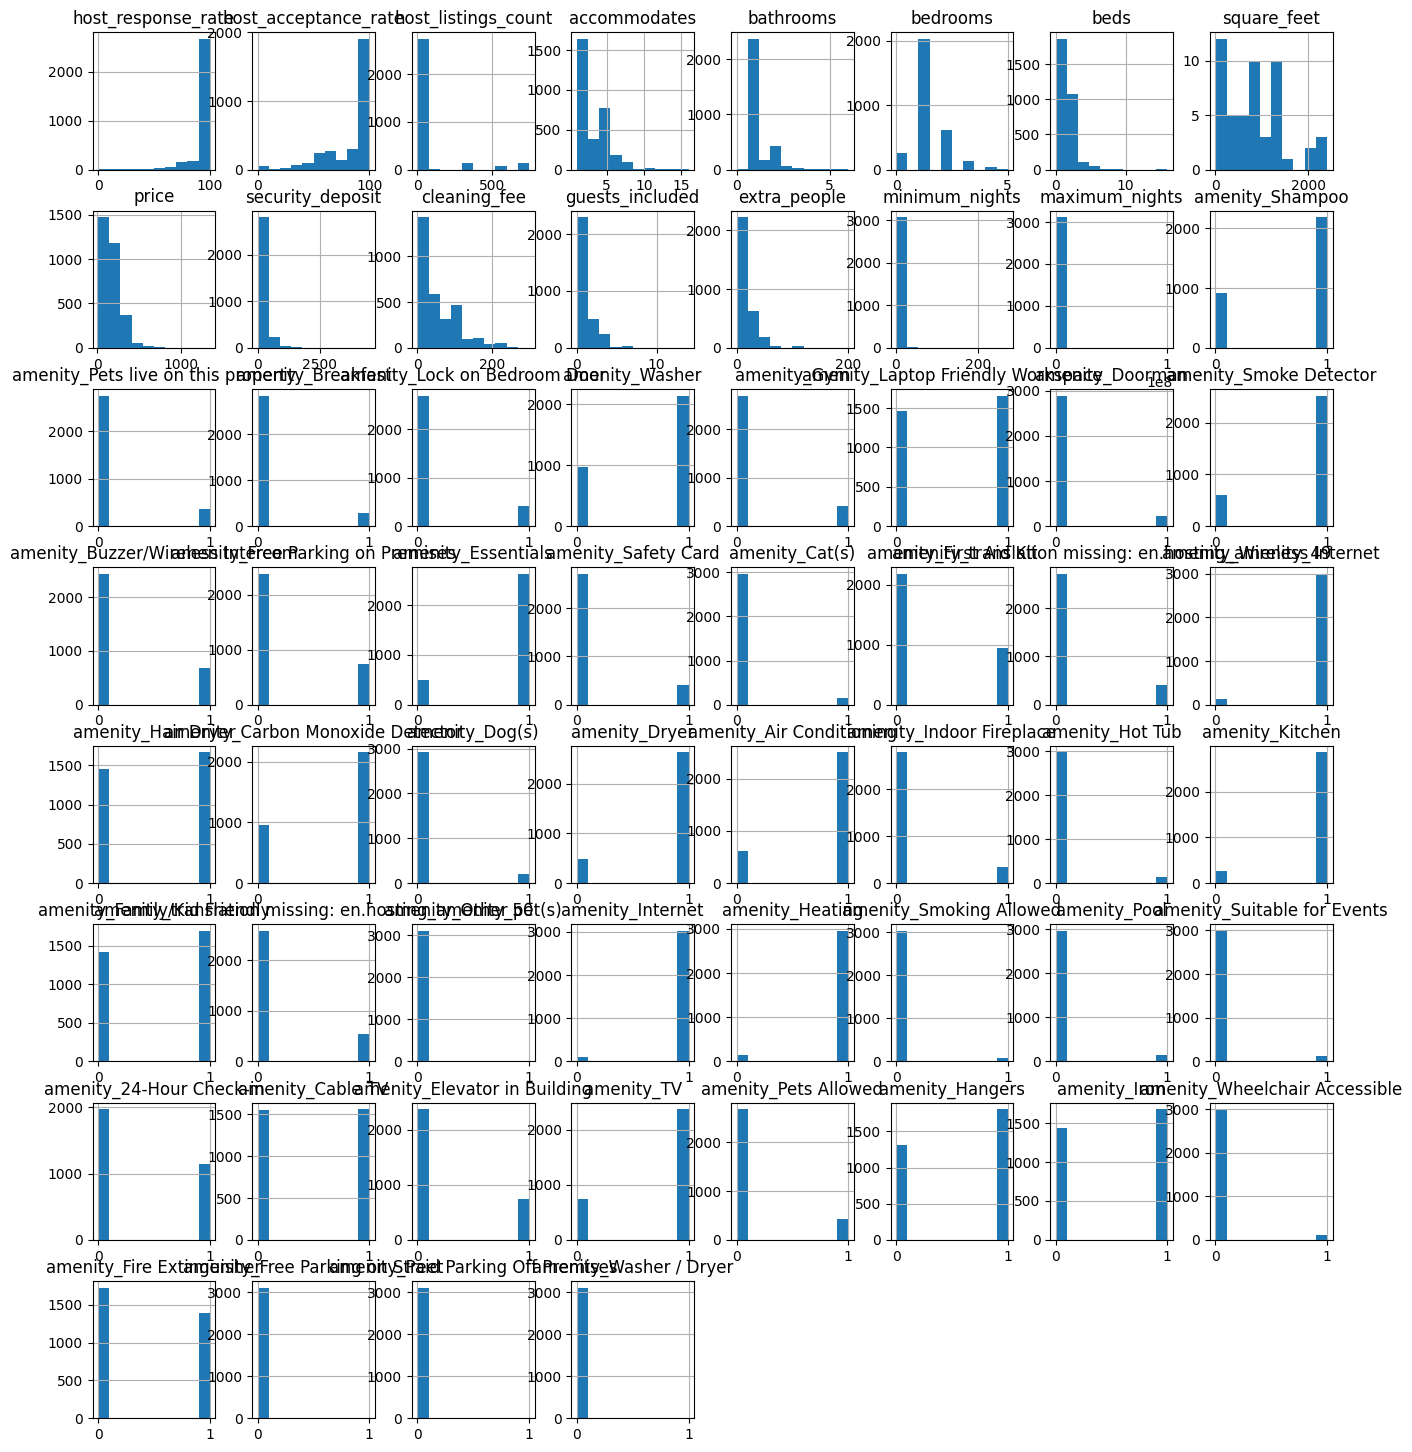

In [22]:
boston_df2.hist(figsize = (16,18));

Now we make the final transformation to take the dataset we have created and convert it into a usable format. To do this we can slightly modify the function given in the Udacity solutions and apply that to the boston_df DataFrame.

In [23]:
## function to clean data (similar to udacity example)

def clean_data(df, y_name=None):
  '''
  Input
  df - pandas dataframe
  y_name - name of column containing data for y

  Output
  1. Drop all rows with no output
  2. Create X out of all non-output columns
  3. Create output y
  4. For Numerical data in X filling with mean values
  5. For categorical data in X creating dummy variables
  '''

  if y_name:
    df = df.dropna(subset=[y_name], axis=0)
    y = df[y_name]
    df = df.drop([y_name], axis=1)

  # filling numeric columns with mean values
  num_features = df.select_dtypes(include=['float','int']).columns
  for col in num_features:
    df[col].fillna(df[col].mean(), inplace=True)

  # making dummy variables (one-hot encoding) for remaining categorical data
  cat_features = df.select_dtypes(include=['object']).copy().columns
  for f in cat_features:
    df = pd.concat([df.drop(f, axis=1), pd.get_dummies(df[f], prefix=f, prefix_sep='_', drop_first=True)], axis=1)

  X = df
  if y_name:
    return X, y
  return X

In [24]:
X,y = clean_data(boston_df2, y_name='price')

In [25]:
X

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,security_deposit,cleaning_fee,...,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,require_guest_profile_picture_t,require_guest_phone_verification_t
1,100.0,100.0,1,2,1.0,1.0,1.0,834.196078,95.0,10.0,...,0,0,0,1,1,1,0,0,0,0
2,100.0,88.0,1,2,1.0,1.0,1.0,834.196078,0.0,0.0,...,0,0,0,1,0,1,0,0,1,0
3,100.0,50.0,1,4,1.0,1.0,2.0,834.196078,100.0,50.0,...,0,0,0,1,0,1,0,0,0,0
4,100.0,100.0,1,2,1.5,1.0,2.0,834.196078,0.0,15.0,...,0,0,0,1,0,0,0,0,0,0
5,100.0,95.0,2,2,1.0,1.0,1.0,834.196078,0.0,30.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,96.0,100.0,28,3,1.0,1.0,1.0,834.196078,95.0,0.0,...,0,0,0,1,1,0,1,0,0,0
3581,10.0,83.0,2,2,1.0,1.0,1.0,834.196078,100.0,15.0,...,0,0,0,1,0,0,1,0,0,0
3582,78.0,50.0,1,4,1.0,1.0,1.0,834.196078,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3583,100.0,96.0,4,2,1.0,1.0,1.0,834.196078,100.0,0.0,...,0,0,0,1,0,0,1,0,0,0


## Linear Regression

Now splitting the cleaned data into training and test data, and fitting linear regression to find relative influence of each feature on price.

In [26]:
# splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

# fitting linear regression
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# predicting training and test data using the linear regression model
y_test_preds = lm_model.predict(X_test)
y_train_preds = lm_model.predict(X_train)

# computing the r2 training and test scores
test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

print("test score:",test_score, "\ntrain score:",train_score)

test score: 0.4965340562314504 
train score: 0.6109523066703244


This is a relatively good $R^2$ score, let's plot the predictions against the true values.

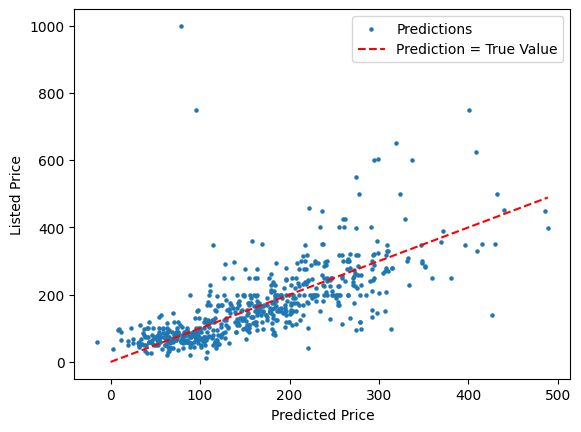

In [27]:
# plotting predictions against the true values
plt.scatter(y_test_preds, y_test, s=5, label='Predictions')
plt.xlabel('Predicted Price')
plt.ylabel('Listed Price')

# Make the line dotted
plt.plot((0, max(y_test_preds)), (0, max(y_test_preds)), 'r--', label='Prediction = True Value')

# Add a legend
plt.legend()

# Show the plot
plt.show();


This passes the visual test - great!

Now let's consider how the coefficients can be interpreted

In [28]:
def coef_weights(coefficients, X_train):
  '''
  Input
  coefficients - sklear coefficients from linear regression
  X_train - the training dataset

  Output
  a dataframe containing the coefficient and absolute coefficient for each feature
  '''
  coefs_df = pd.DataFrame()
  coefs_df['feature'] = X_train.columns
  coefs_df['coefficient'] = lm_model.coef_
  coefs_df['abs_coefficient'] = np.abs(lm_model.coef_)

  coefs_df = coefs_df.sort_values('abs_coefficient', ascending=False)
  return coefs_df

coef_df = coef_weights(lm_model.coef_, X_train)

In [29]:
coef_df.head(50)

,feature,coefficient,abs_coefficient
58,amenity_Washer / Dryer,306.266554,306.266554
79,neighbourhood_Harvard Square,-162.572041,162.572041
114,cancellation_policy_super_strict_30,107.925538,107.925538
77,neighbourhood_Financial District,95.930467,95.930467
74,neighbourhood_Downtown Crossing,79.001313,79.001313
95,property_type_Boat,78.595962,78.595962
102,property_type_Other,68.451341,68.451341
57,amenity_Paid Parking Off Premises,-67.178934,67.178934
82,neighbourhood_Leather District,60.728265,60.728265
65,neighbourhood_Back Bay,59.312484,59.312484


Now that the coefficients have been converted to dataframe form lets begin filtering for the coefficients we want to look

In [30]:
def filter_coef_df(df, features, minimum_threshhold=0):
  '''
  Input
  df - coefficients dataframe
  features - list of features of interest
  minimum_threshhold - the minimum absolute coefficient value to include

  Output
  A filtered coefficient dataframe
  '''
  return df[(df['feature'].isin(features)) & (coef_df['abs_coefficient'] > minimum_threshhold)]


### Neighbourhoods

<ipython-input-31-68b87dcaed47>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbourhood_coef_df['color'] = np.where(neighbourhood_coef_df['coefficient'] >= 0, 'green', 'red')


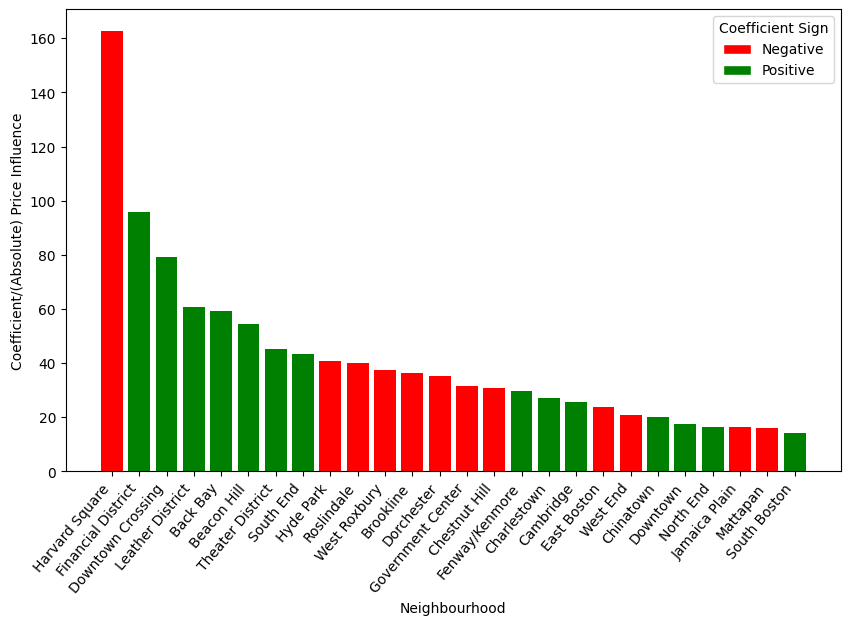

In [31]:
neighbourhood_columns = [feature for feature in X.columns if 'neighbour' in feature]
neighbourhood_coef_df = filter_coef_df(df=coef_df, features=neighbourhood_columns, minimum_threshhold=5)

# set color based on the sign of the adjusted coefficient
neighbourhood_coef_df['color'] = np.where(neighbourhood_coef_df['coefficient'] >= 0, 'green', 'red')

# plotting the bar chart with customized colors
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(neighbourhood_coef_df['feature'], neighbourhood_coef_df['abs_coefficient'], color=neighbourhood_coef_df['color'])

# set x-tick positions and labels
tick_positions = range(len(neighbourhood_coef_df['feature']))
ax.set_xticks(tick_positions)
ax.set_xticklabels([label.replace('neighbourhood_', '') for label in neighbourhood_coef_df['feature']], rotation=50, ha='right')

# including a legend
ax.legend(handles=[plt.Rectangle((0,0),1,1,color='red', ec='w'), plt.Rectangle((0,0),1,1,color='green', ec='w')],
          labels=['Negative', 'Positive'], title='Coefficient Sign')

plt.xlabel('Neighbourhood')
plt.ylabel('Coefficient/(Absolute) Price Influence')
plt.show()

Here we can see that Downtown Crossing, Financial District, and Back Bay are all the more expensive neighborhoods

### Amenities

<ipython-input-32-bf865c246007>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amenity_coef_df['color'] = np.where(amenity_coef_df['coefficient'] >= 0, 'green', 'red')


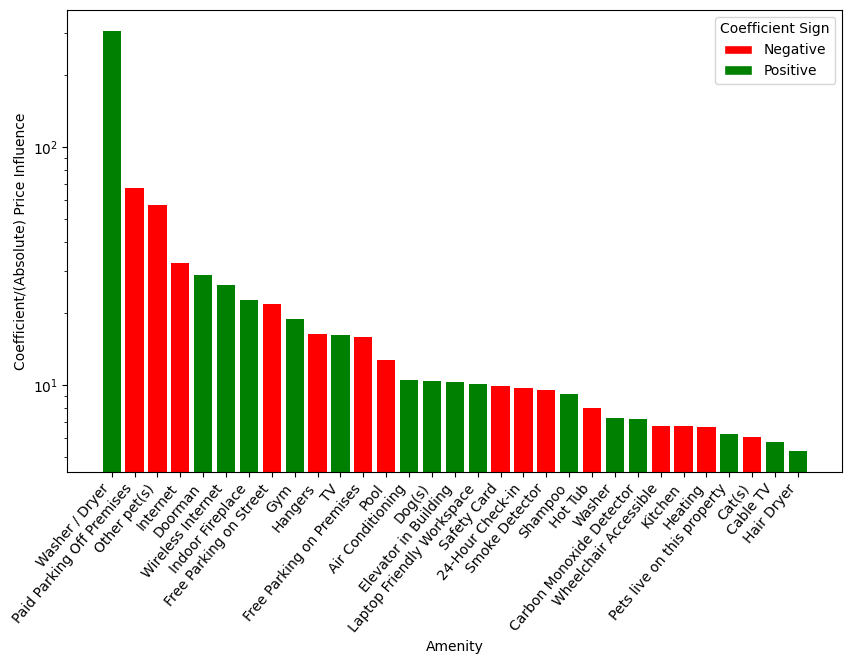

In [32]:
amenity_coef_df = coef_df[(coef_df['feature'].isin(amenity_columns)) & (coef_df['abs_coefficient'] > 5)]

# set color based on the sign of the adjusted coefficient
amenity_coef_df['color'] = np.where(amenity_coef_df['coefficient'] >= 0, 'green', 'red')

# plotting the bar chart with customized colors
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(amenity_coef_df['feature'], amenity_coef_df['abs_coefficient'], color=amenity_coef_df['color'])

# adjust x-labels to exclude the 'amenity_' prefix
tick_positions = range(len(amenity_coef_df['feature']))
ax.set_xticks(tick_positions)
ax.set_xticklabels([label.replace('amenity_', '') for label in amenity_coef_df['feature']], rotation=50, ha='right')

# including a legend
ax.legend(handles=[plt.Rectangle((0,0),1,1,color='red', ec='w'), plt.Rectangle((0,0),1,1,color='green', ec='w')],
          labels=['Negative', 'Positive'], title='Coefficient Sign')

plt.yscale('log')
plt.xlabel('Amenity')
plt.ylabel('Coefficient/(Absolute) Price Influence')
plt.show();

## Numerical Features

The coefficients fir numerical features don't give the full story - to understand the importance of each feature we factor in the standard deviation $\sigma_i$, and the linear regression coefficients $\alpha_i$. To obtain the importance of the coefficient, $\sigma_i\alpha_i$

In [33]:
def numerical_adjustment(feature_name):
  return numerical_std[feature_name]

<ipython-input-34-57b628c5a155>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  numerical_std = X[numerical_columns].std()
<ipython-input-34-57b628c5a155>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_coef_df['std'] = numerical_coef_df['feature'].apply(numerical_adjustment)
<ipython-input-34-57b628c5a155>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_coef_df['impact'] = numerical_coef_df['coefficient'] * numeri

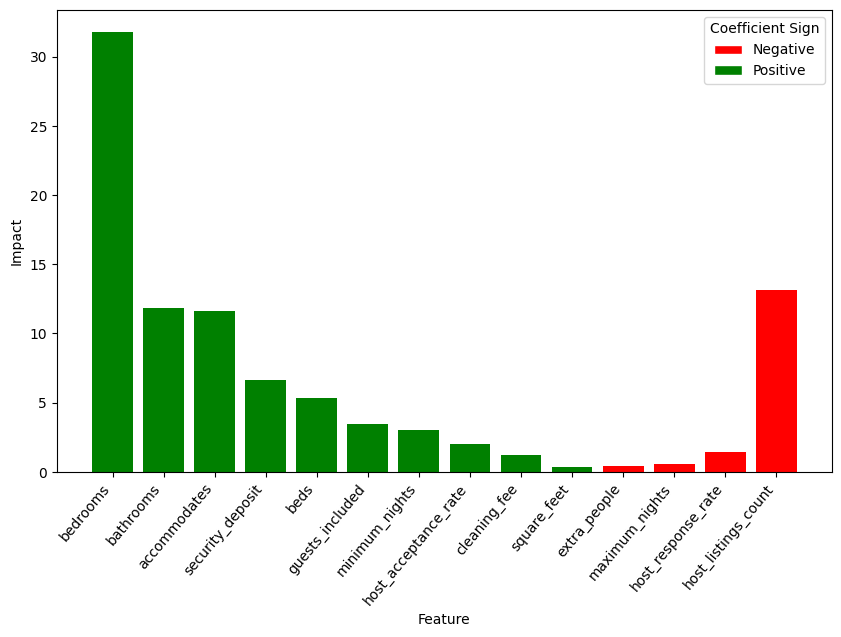

In [34]:
import numpy as np
import matplotlib.pyplot as plt

numerical_columns = set(X.select_dtypes(include=['float','int']).columns)-set(neighbourhood_columns)-set(amenity_columns)

# assuming numerical_columns is defined as a set earlier in your code
numerical_std = X[numerical_columns].std()

numerical_coef_df = filter_coef_df(df=coef_df, features=numerical_columns);
numerical_coef_df['std'] = numerical_coef_df['feature'].apply(numerical_adjustment)
numerical_coef_df['impact'] = numerical_coef_df['coefficient'] * numerical_coef_df['std']

# sorting based on importance
numerical_coef_df = numerical_coef_df.sort_values(by='impact', ascending=False);

# set color based on the sign of the adjusted coefficient
numerical_coef_df['color'] = np.where(numerical_coef_df['coefficient'] >= 0, 'green', 'red');

# plotting the bar chart with customized colors
fig, ax = plt.subplots(figsize=(10, 6));
bars = ax.bar(range(len(numerical_coef_df)), np.abs(numerical_coef_df['impact']), color=numerical_coef_df['color']);

# adjust x-labels to exclude the 'neighbourhood_' prefix
tick_positions = range(len(numerical_coef_df['feature']))
ax.set_xticks(tick_positions)
ax.set_xticklabels([label.replace('neighbourhood_', '') for label in numerical_coef_df['feature']], rotation=50, ha='right');

# including a legend
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color='red', ec='w'), plt.Rectangle((0, 0), 1, 1, color='green', ec='w')],
          labels=['Negative', 'Positive'], title='Coefficient Sign');

plt.xlabel('Feature');
plt.ylabel('Impact');
plt.show();

<ipython-input-35-f9f74d4f2892>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_coef_df['color'] = np.where(filtered_coef_df['coefficient'] >= 0, 'green', 'red')


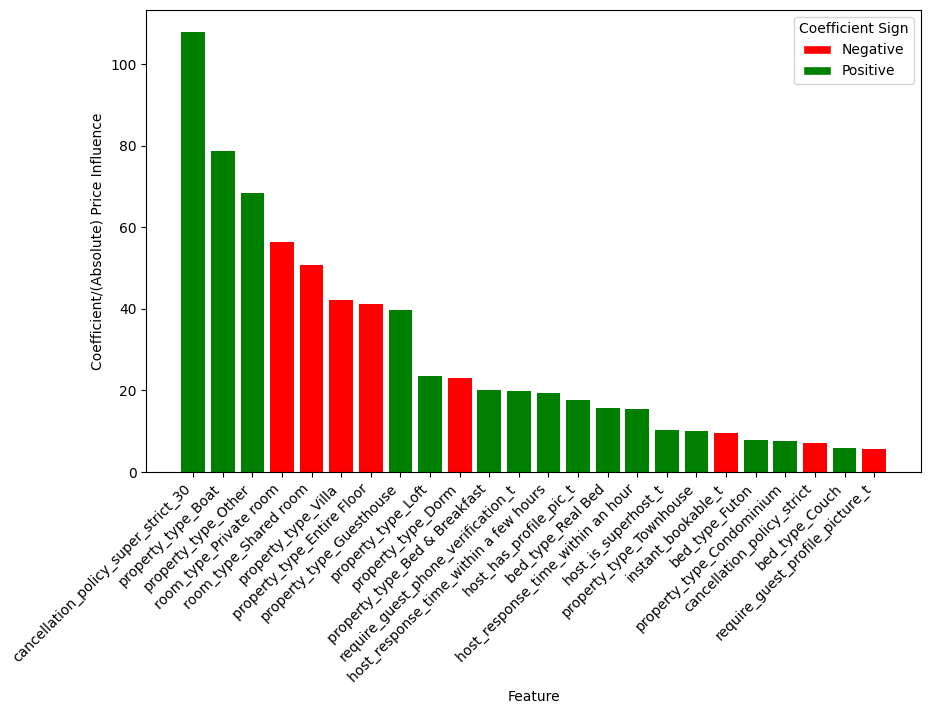

In [35]:
# remaining columns
other_columns = set(X.columns)-set(neighbourhood_columns)-set(amenity_columns)-set(numerical_columns)

filtered_coef_df = coef_df[(coef_df['feature'].isin(other_columns)) & (coef_df['abs_coefficient'] > 5)]

# set color based on the sign of the adjusted coefficient
filtered_coef_df['color'] = np.where(filtered_coef_df['coefficient'] >= 0, 'green', 'red')

# plotting the bar chart with customized colors
fig, ax = plt.subplots(figsize=(10,6))
bars = ax.bar(filtered_coef_df['feature'], filtered_coef_df['abs_coefficient'], color=filtered_coef_df['color'])

# adjust x-labels to exclude the 'amenity_' prefix
tick_positions = range(len(filtered_coef_df['feature']))
ax.set_xticks(tick_positions)
ax.set_xticklabels([label.replace('amenity_', '') for label in filtered_coef_df['feature']], rotation=45, ha='right')

# include a legend
ax.legend(handles=[plt.Rectangle((0,0),1,1,color='red', ec='w'), plt.Rectangle((0,0),1,1,color='green', ec='w')],
          labels=['Negative', 'Positive'], title='Coefficient Sign')

plt.xlabel('Feature')
plt.ylabel('Coefficient/(Absolute) Price Influence')
plt.show();

## Discussion and Conclusions

### Main Findings

The most expensive neighbourhoods add nearly $100 to the average nightly price of \$171, the top three being the Financial District (+\$96), Downtown Crossing (+\$79) and the Leather District (+\$61). Some of the cheaper neighbourhoods could save potential guests around \$40. Hosts can use this to decide a nightly price, and guests can decide which neighbourhoods best fit their budget.

The analysis also suggests that hosts should also consider investing in more amenities if they do not yet have them, this includes a washer/dryer, wireless internet, a TV, air conditioning, laptop-friendly workspace, and bathroom appliances. Also, consider carefully whether to have their pets in the Airbnb, there is some (limited) evidence that guests like dogs but other pets less so.

Other than the neighbourhood and amenities, few features largely affect nightly price. An obvious one is the capacity, number of bedrooms and bathrooms. Hosts may want to consider their selection process, response time and superhost status but this should be done with a grain of salt.

### Causation or Corellation

When reflecting on these coefficients it is important to think about causality. To illustrate this let's consider the example of cancellation policy: We've found that if a cancellation policy is "super strict" this predicts an increase in price by about 110$. Now does this mean that any host can make their cancellation policy more strict and charge a higher price? Probably not. The likely explanation is that the more expensive accommodation implement a stricter cancellation policy. This highlights that the information gained from these coefficients should be thought about critically using business knowledge to really considering whether correlation or causation is more probable.